----------------------------------
# Cars4U Project : Pricing model for effectively predicting the price of used cars | **Linear Regression**
----------------------------------

## Context: 

- There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

- Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.


## Problem Statement / Requirement:

**We need to to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.**

- This can give an strategical advantange for the business and ascertain the buying-selling price for the old car.
- To draw the customer insights and prefernce geographically.
- Aid to the target advertisemnet for the potential customers.


**Steps :**

- Explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business.

## Data Dictionary :

- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities- 
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Exploratory Data Analysis

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
sns.set(color_codes=True) # adds a nice background to the graphs

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#splitting data into test and training set
from sklearn.model_selection import train_test_split

# To create linear regression model
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor #for Multi-Collinearlity checks

### Load and explore the data

In [2]:
# Load the data into pandas dataframe

data = pd.read_csv("used_cars_data.csv")

### Overview of the data

In [3]:
# let us make another copy of data
df = data.copy()
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Check number of rows and columns

In [4]:
df.shape

(7253, 14)

In [5]:
df.columns #columns name

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Observations**
- There are 7253 rows and 14 columns in the dataset.
-  There are many missing values present in the data in different columns.
- Some columns have incorrect data types: **Mileage**, **Engine**, **Power** and **New_Price**. It is beacuse of units mentioned in data for these columns e.g. km/kg, CC, bhp and Lakh. We would need to covert it into float datatype removing the suffix.

In [7]:
df.describe(include = 'all')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,NaN,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,3626.000000,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,2093.905084,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,0.000000,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1813.000000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3626.000000,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,5439.000000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [8]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [9]:
df[df['Engine'].isnull()].head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93


# Observations
- Engine and Power columns are having null value together. Seems these both information are related to each other, in terms od data collection.
- New_Price has 6247 null values out of 7253 : i.e. 86% of the values in New_Price column is NaN. (We can impute all the null values or also we can drop this features). 
- Price column has 1234 missing values, since Price is going to be dependent variable (label) for our model, so we can remove these rows for current supervised learning based model.
- Mileage and Seats are also having few missing values, we can impute these values with further analysis.
- We can convert the Year to Age (Current_Year - Year) columns for better feed to model.

## Data Preprocessing and further EDA

In [10]:
df = df[df['Price'].notna()] #removing the rows where labels (price) are not present - supervised learning model 

**Data Preparation for Modelling**

In [11]:
def val_to_number(val):
    ''' Removing the units/suffix from the data
        and changing into float'''
    if isinstance (val, str):
        return float(val.replace('bhp','').replace('null','-1').replace('CC','').replace('km/kg','').replace('kmpl',''))
    else:
        return np.nan

In [12]:
df['Power'] = df['Power'].apply(val_to_number)
df['Mileage'] = df['Mileage'].apply(val_to_number)
df['Engine'] = df['Engine'].apply(val_to_number)
df.loc[df['Power'] == -1, 'Power']= np.nan

In [13]:
def newprice_to_number(val):
    '''Coverting the values in (Lakh/Cr) units
       into Lakh and removing the suffix'''
    if isinstance(val, str):
        multiplier = 1
        if val.endswith('Cr'):
            multiplier = 100
        return float(val.replace('Lakh','').replace('Cr',''))*multiplier
    else :
        return np.nan

In [14]:
df['New_Price'] = df['New_Price'].apply(newprice_to_number)    # Keeping the New_Price in Lakh unit since Price is also in Lakh unit

In [15]:
df['Name'].nunique()

1876

**We have many Cars name and it wont be good to take it as categorical variable and encode it, rather it's better to take out the brand from the name and use it as brand variable.**

In [16]:
def position_to_num(pos_val):
    '''Coverting Car Name to Brand
       by taking out the first word'''
    if isinstance(pos_val, str):
        return pos_val.split(' ')[0].upper()
    else:
        return np.nan

In [17]:
df['Brand'] = df['Name'].apply(position_to_num)

**Year of Manufacturing to Aging :**

In [18]:
df['Age'] = abs(df['Year']-int(pd.to_datetime('today').year)) #Getting the age of the car(Here Age : We are defining as how much old the model is)

In [20]:
df_model = df.drop(['S.No.','Name','Year'],axis=1)      #preparing dataframe for learning model

In [21]:
df_model.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Age
count,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,824.000000,6019.000000,6019.000000
mean,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,23.075655,9.479468,7.641801
std,9.126884e+04,4.582289,601.355233,53.874957,0.808840,26.182412,11.187917,3.269742
min,1.710000e+02,0.000000,72.000000,34.200000,0.000000,3.910000,0.440000,2.000000
25%,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.977500,3.500000,5.000000
50%,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,11.670000,5.640000,7.000000
75%,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,26.560000,9.950000,10.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,230.000000,160.000000,23.000000


**Here We can see the min Mileage and Seats are 0, that can not be possible for a moving car, so we would need to replace 0 with NaN for further imputation.**

In [22]:
df_model.loc[df['Mileage'] == 0, 'Mileage']= np.nan

In [23]:
df_model.loc[df['Seats'] == 0, 'Seats']= np.nan

**Correcting DataTypes**

In [24]:
df_model['Location'] = df_model['Location'].astype('category')
df_model['Owner_Type'] = df_model['Owner_Type'].astype('category')
df_model['Fuel_Type'] = df_model['Fuel_Type'].astype('category')
df_model['Transmission'] = df_model['Transmission'].astype('category')
df_model['Age'] = df_model['Age'].astype('float64')
df_model['Brand'] = df_model['Brand'].astype('category')
df_model['Kilometers_Driven'] = df_model['Kilometers_Driven'].astype('float64')

## Univariate Analysis

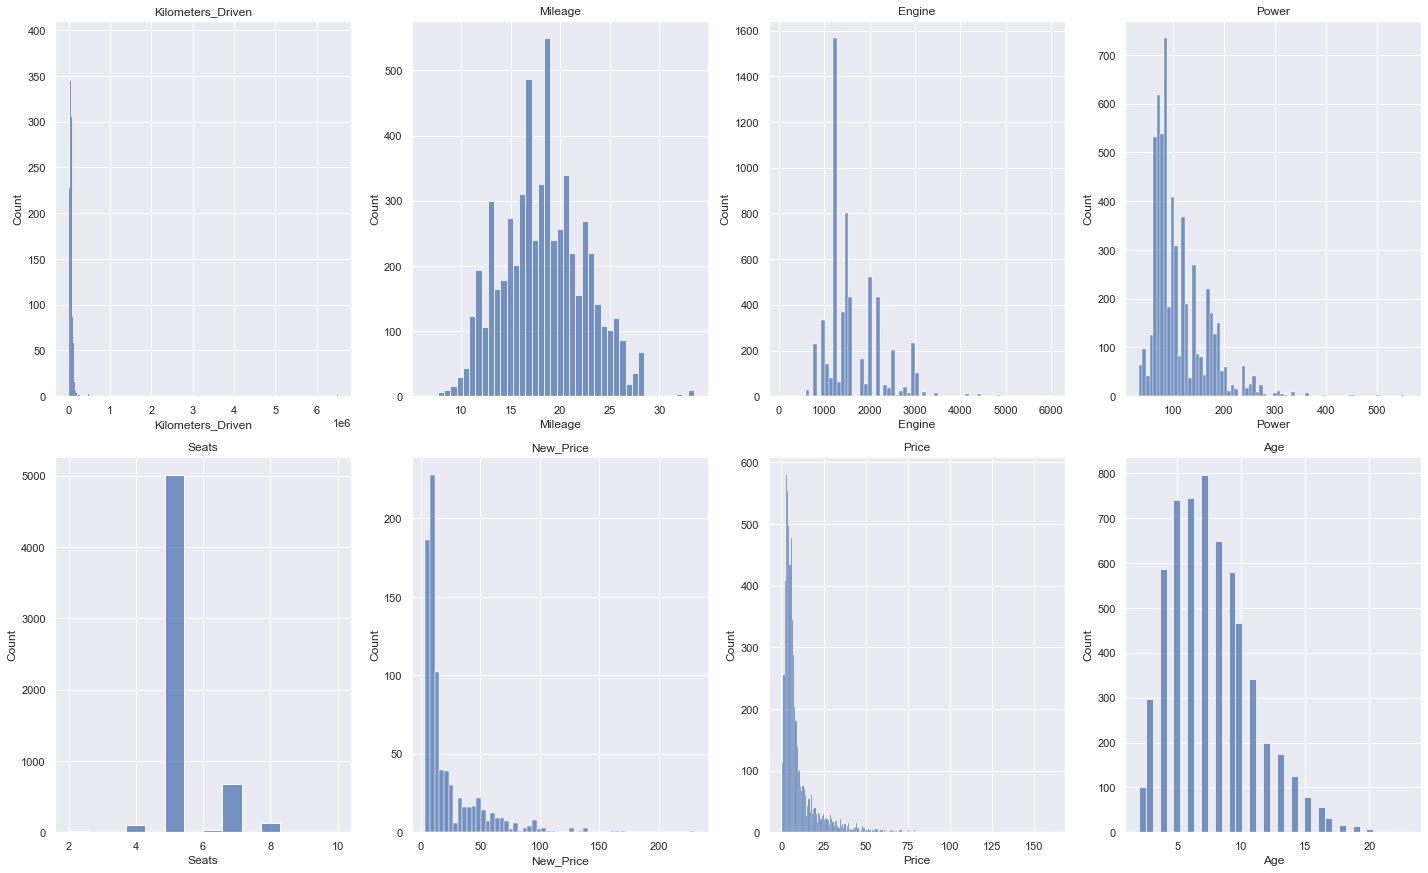

In [25]:
numeric_col1 = df_model.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_col1):
                     plt.subplot(5,4,i+1)
                     sns.histplot(df_model[variable])
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

**Categorical Variables**

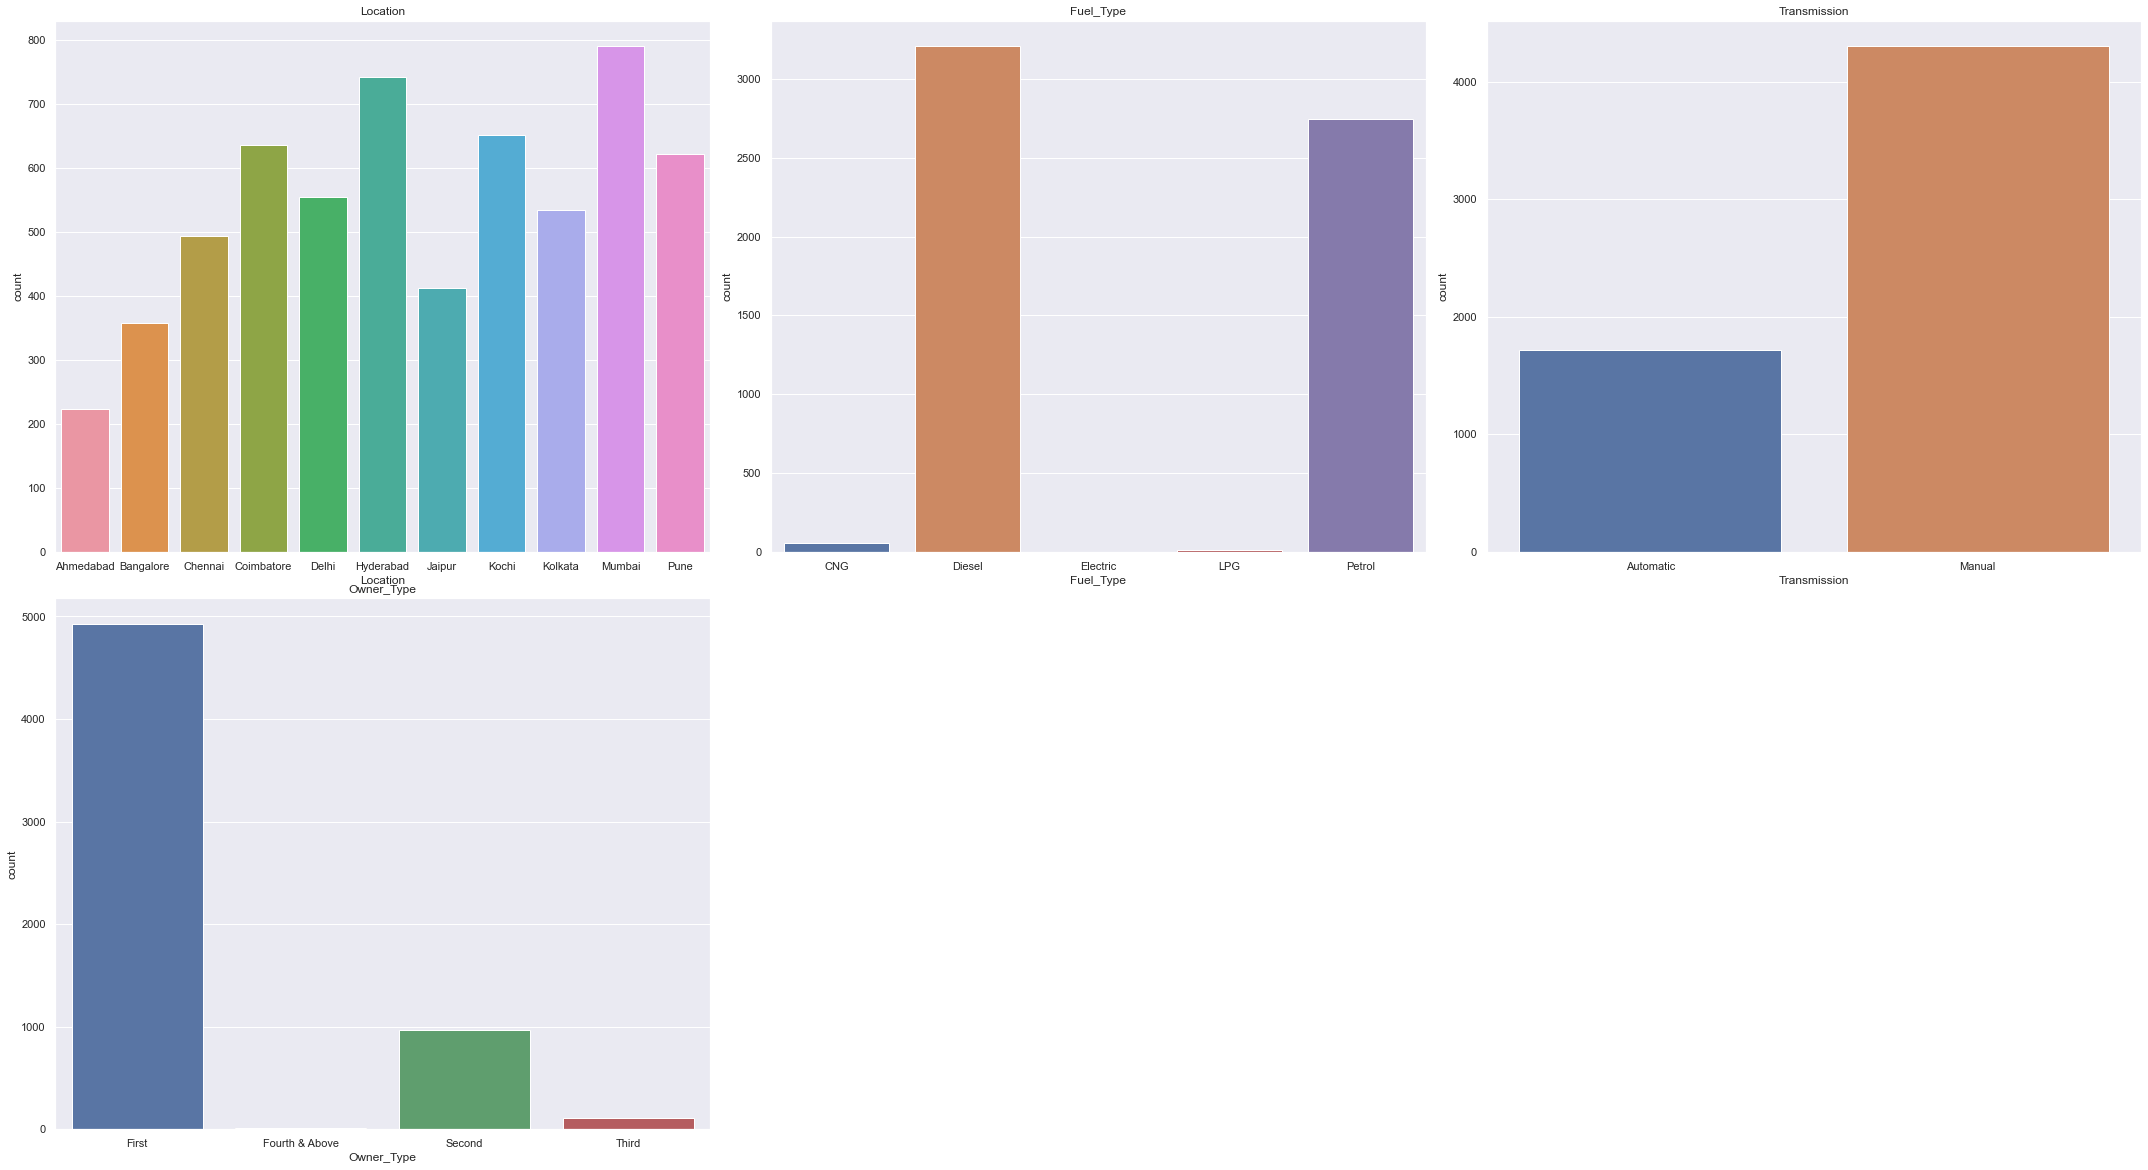

In [26]:
cat_col = df_model.select_dtypes(include='category').columns.tolist()
cat_col.remove('Brand')
plt.figure(figsize=(30,40))

for i, variable in enumerate(cat_col):
                     plt.subplot(5,3,i+1)
                     sns.countplot(df_model[variable])
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

<AxesSubplot:xlabel='Brand', ylabel='count'>

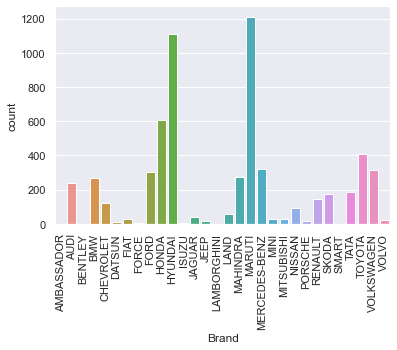

In [27]:
plt.xticks(rotation=90)
sns.countplot(df_model['Brand'])

**Observations**

- There are many outliers in different features like Kilometers_Driven, New_Price etc.
- Most of the cars are first_hand owner type.
- There are very few cars in CNG, LPG and Electric Fuel type.
- There are 11 different locations present in data.

## Bivariate Analysis

In [28]:
#sns.pairplot(data=df_model)

<AxesSubplot:>

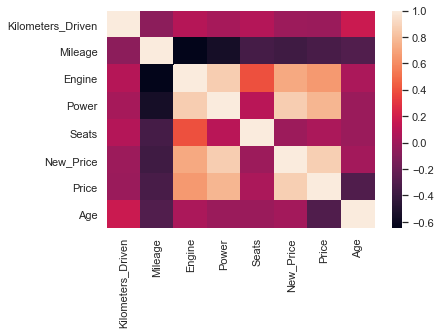

In [29]:
sns.heatmap(df_model.corr())   # Correlation Matrix

- We can see good positive correlation of Price with Engine, Power and New_Price.
- While we have negative correlation of Price with Mileage.


**Outliers Check**

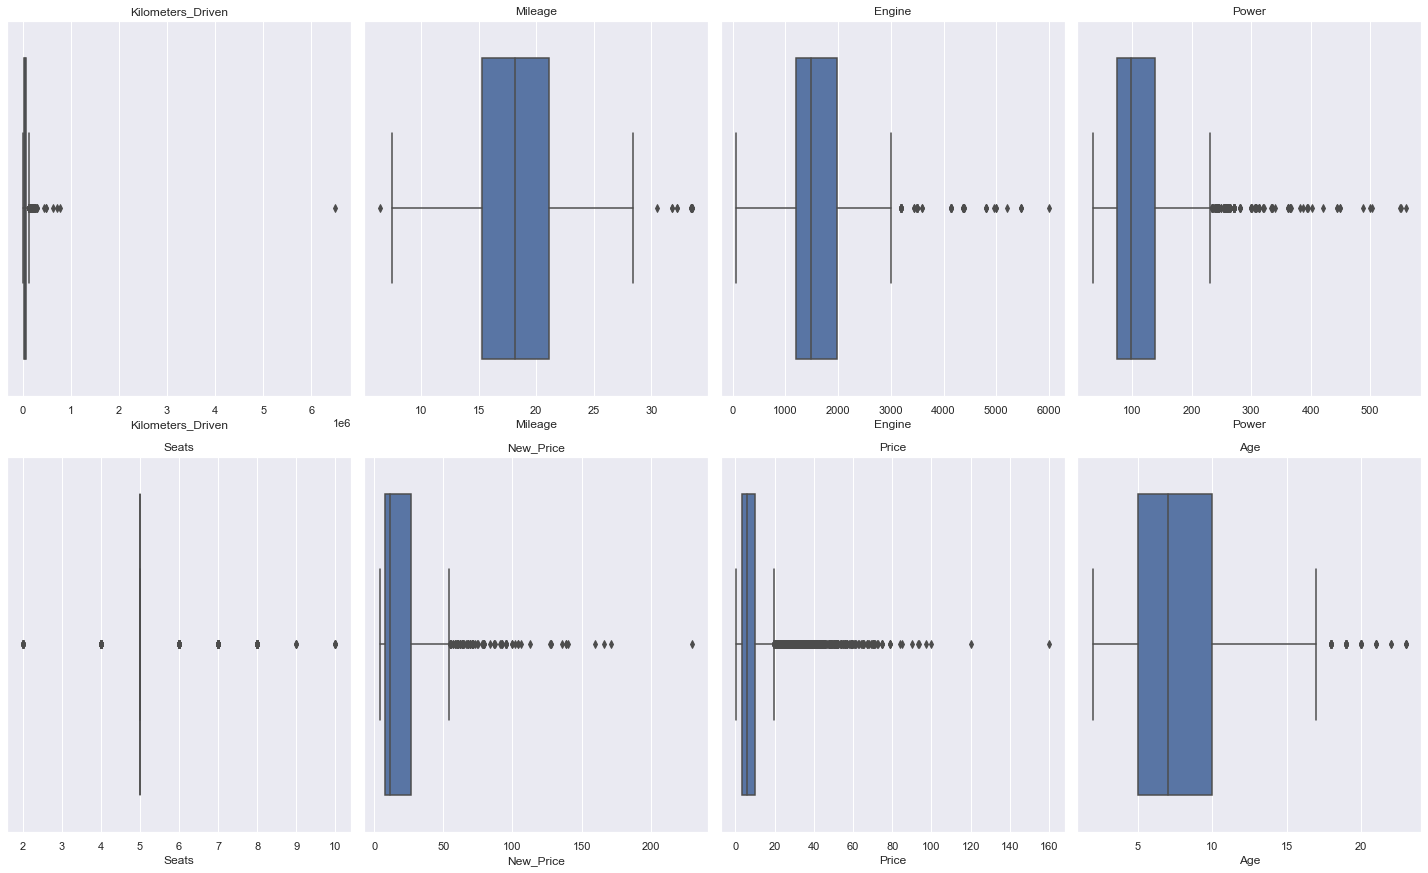

In [30]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_col1):
                     plt.subplot(5,4,i+1)
                     sns.boxplot(df_model[variable],orient = "h"  , whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [31]:
df_model.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Age
count,6.019000e+03,5949.000000,5983.000000,5876.000000,5976.000000,824.000000,6019.000000,6019.000000
mean,5.873838e+04,18.342252,1621.276450,113.253050,5.279618,23.075655,9.479468,7.641801
std,9.126884e+04,4.175475,601.355233,53.874957,0.806019,26.182412,11.187917,3.269742
min,1.710000e+02,6.400000,72.000000,34.200000,2.000000,3.910000,0.440000,2.000000
25%,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,7.977500,3.500000,5.000000
50%,5.300000e+04,18.200000,1493.000000,97.700000,5.000000,11.670000,5.640000,7.000000
75%,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,26.560000,9.950000,10.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,230.000000,160.000000,23.000000


Observations:

- Kilometers_Driven has the highest range with max of 6500000 Km.
- Engine ranges from 72 CC to 5998 CC.
- Most of the cars are 5 seater.
- The New_Price car are ranging from 3.91 Lakh to 2.3 cr.
- The model of cars are maximum 23 years old.


## There are outliers present in most of the feature present in the dataset. We would need to remove this.
- Here we are using IQR method.
- There is no much skewneess present in the data.

**Missig Value Treatment by column median grouped by 'Brand' name**

In [32]:
columns = df_model.select_dtypes(include=np.number).columns.tolist()
for col in columns:
    df_model[col] = df_model[col].fillna(df_model.groupby('Brand')[col].transform('median'))  #treating by column median


In [33]:
#there are still few missing value where there was no value present for all of the cars in the Brand

Filler = lambda x: x.fillna(x.mean())
columns = ['Mileage','Power', 'New_Price']
df_model[columns] = df_model[columns].apply(Filler,axis=0)

## Outlier Treatment

In [34]:
# outliers action
def outliers_action(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def outliers_action_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = outliers_action(df,c)
        
    return df


numerical_col = df_model.select_dtypes(include=np.number).columns.tolist()

df_model = outliers_action_all(df_model,numerical_col)

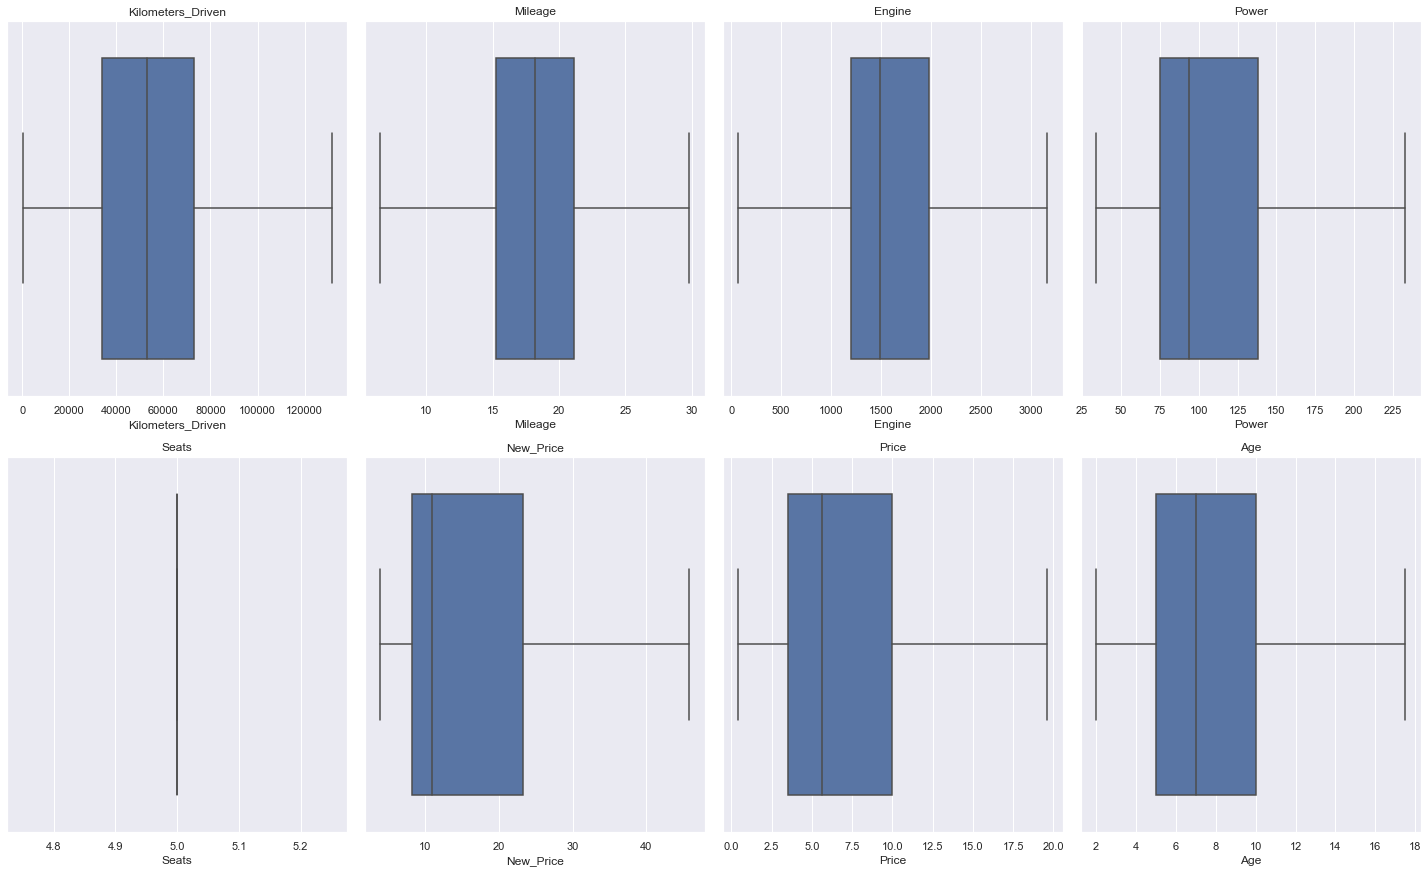

In [35]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_col1):
                     plt.subplot(5,4,i+1)
                     sns.boxplot(df_model[variable],orient = "h"  , whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Distributions

In [36]:
df_model.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Age
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.0,6019.000000,6019.000000,6019.000000
mean,56106.896661,18.317169,1612.584898,111.055054,5.0,17.373403,7.708463,7.625851
std,30040.626708,4.140846,569.716189,46.840288,0.0,13.835008,5.769853,3.213540
min,171.000000,6.575000,72.000000,34.200000,5.0,3.910000,0.440000,2.000000
25%,34000.000000,15.290000,1197.000000,75.000000,5.0,8.160000,3.500000,5.000000
50%,53000.000000,18.200000,1493.000000,93.700000,5.0,10.940000,5.640000,7.000000
75%,73000.000000,21.100000,1984.000000,138.100000,5.0,23.250000,9.950000,10.000000
max,131500.000000,29.815000,3164.500000,232.750000,5.0,45.885000,19.625000,17.500000


- In the new_price feature, right skewness can be seen in the data. 
- In all the other feature, there is no signifcant skewness.

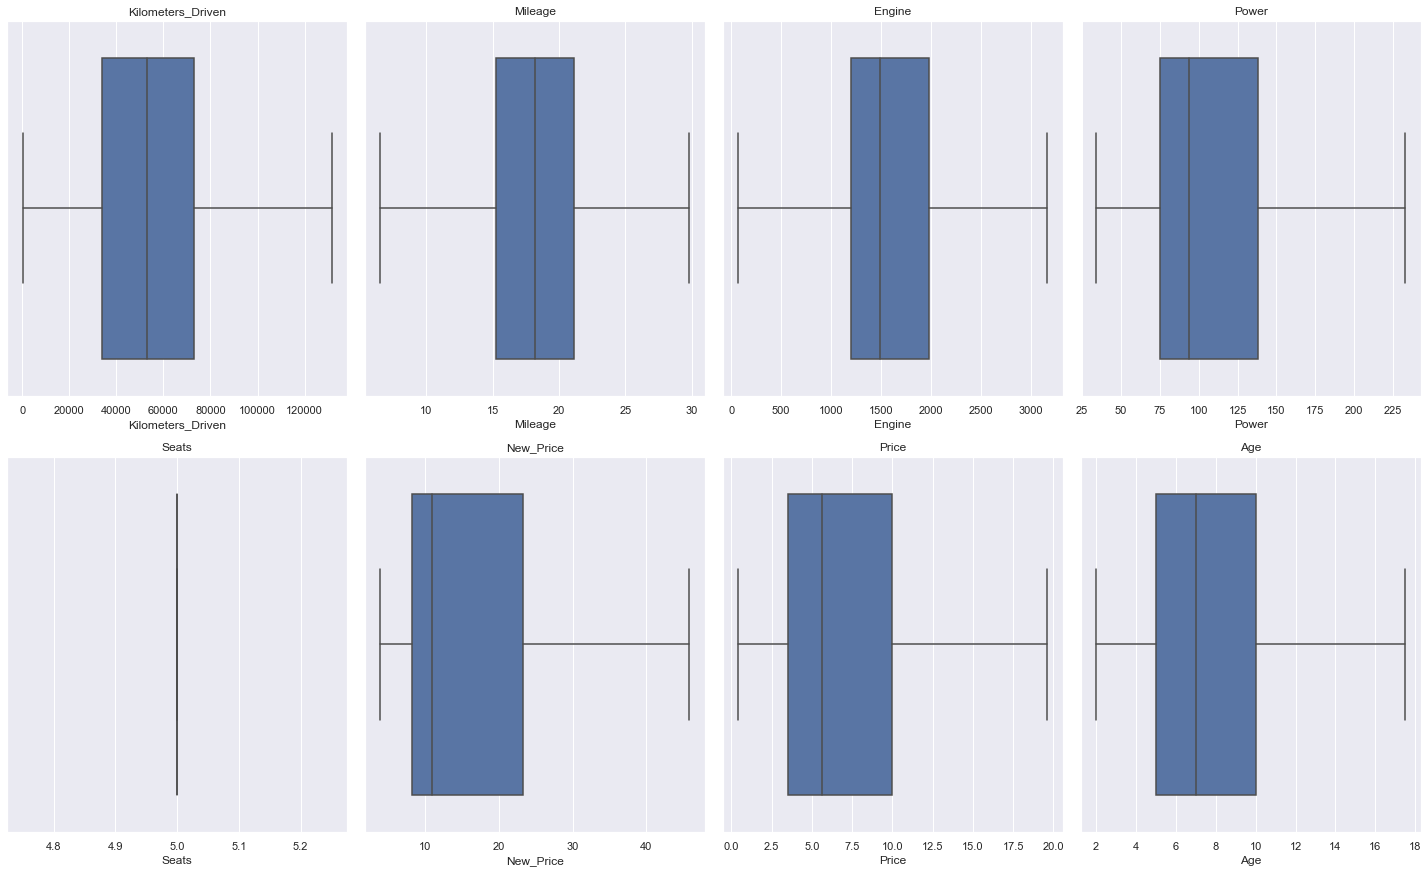

In [37]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_col1):
                     plt.subplot(5,4,i+1)
                     sns.boxplot(df_model[variable],orient = "h"  , whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

## Log Transformations

In [38]:
df_model['New_Price' + '_log'] = np.log(df_model['New_Price'] + 1)
df_model['Age' + '_log'] = np.log(df_model['Age'] + 1)
df_model['Power' + '_log'] = np.log(df_model['Power'] + 1)
df_model['Kilometers_Driven' + '_log'] = np.log(df_model['Kilometers_Driven'] + 1)

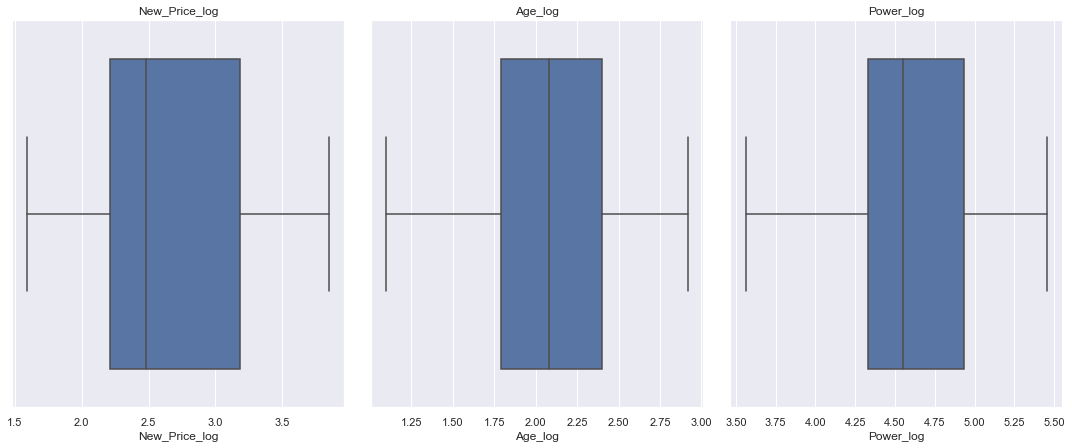

In [39]:
#After Log-Transformation
numeric_col2 = ['New_Price_log','Age_log','Power_log']
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_col2):
                     plt.subplot(5,4,i+1)
                     sns.boxplot(df_model[variable],orient = "h"  , whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

- Skewness removed well after log-transformation.

In [40]:
number_col = df_model.select_dtypes(include=np.number).columns.tolist()
number_col.remove('Price') # Price as Label for the model (Dependent Variable)
number_col.remove('New_Price')
number_col.remove('Power') 
number_col.remove('Age') 
number_col.remove('Kilometers_Driven')  # since we will be using log-transformed value

df_model[number_col] = MinMaxScaler().fit_transform(df_model[number_col])  #Scaling 
#df_model[number_col] = StandardScaler().fit_transform(df_model[number_col]) 

In [41]:
#dropeed Price column (since it's label)
model_col = ['Location', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Seats', 'Brand', 'New_Price_log', 'Age_log', 'Power_log','Kilometers_Driven_log']

In [42]:
#Defining X and y variables
X = df_model[model_col]
y = df_model[['Price']]

print(X.head())
print(y.head())

     Location Fuel_Type Transmission Owner_Type   Mileage    Engine  Seats  \
0      Mumbai       CNG       Manual      First  0.861661  0.299434    0.0   
1        Pune    Diesel       Manual      First  0.563468  0.488278    0.0   
2     Chennai    Petrol       Manual      First  0.500215  0.364430    0.0   
3     Chennai    Diesel       Manual      First  0.610800  0.380275    0.0   
4  Coimbatore    Diesel    Automatic     Second  0.371127  0.613096    0.0   

     Brand  New_Price_log   Age_log  Power_log  Kilometers_Driven_log  
0   MARUTI       0.264091  0.762053   0.274244               0.909277  
1  HYUNDAI       0.327908  0.465764   0.678592               0.824466  
2    HONDA       0.297608  0.714222   0.494096               0.841797  
3   MARUTI       0.264091  0.661830   0.494449               0.937780  
4     AUDI       1.000000  0.603912   0.735985               0.823249  
   Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74


In [43]:
#categorical columns - encoding

cat_col = df_model.select_dtypes(include='category').columns.tolist()
X = pd.get_dummies(X, columns=cat_col, drop_first=True)

## Model Building : Linear Regression

In [44]:
#split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
#Fitting linear model
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)                                  

#pred = linearregression.predict(X_test) 

LinearRegression()

- relationship with dependent variable

In [46]:
coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

                           Coefficients
Mileage                   -3.035694e+00
Engine                     2.834040e+00
Seats                     -3.286260e-13
New_Price_log              5.296511e+00
Age_log                   -9.164603e+00
Power_log                  7.251090e+00
Kilometers_Driven_log     -2.083198e+00
Location_Bangalore         7.605267e-01
Location_Chennai          -4.857405e-02
Location_Coimbatore        2.737760e-01
Location_Delhi            -5.192673e-01
Location_Hyderabad         4.334254e-01
Location_Jaipur           -9.146858e-02
Location_Kochi            -4.334549e-01
Location_Kolkata          -1.212974e+00
Location_Mumbai           -4.336635e-01
Location_Pune             -2.507566e-01
Fuel_Type_Diesel           5.955397e-01
Fuel_Type_Electric         8.429999e+00
Fuel_Type_LPG             -2.238350e-01
Fuel_Type_Petrol          -9.813079e-01
Transmission_Manual       -1.127161e+00
Owner_Type_Fourth & Above -1.653510e+00
Owner_Type_Second         -3.967083e-01


### Insights

- Power (+) and Age of Car (-) seems to be significant factor in determining the price of old car.

In [47]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [48]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train, y_train))

Training Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  1.837957  1.338588  27.893571  0.897676      0.896347


- Adjusted $R^2$ in training data is 0.896

In [49]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test, y_test))

Test Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  1.926967  1.369653  28.903067  0.890531      0.887155


- Adjusted $R^2$ in test data is achieved to 0.887
- Also R2 differ in train and test is less than 0.01, that reflects that model is not overfitted.

--------

--------

# Coefficient Importance : 

1. Power and Year(Age) come out to be very signifcant, as expected. As age of the car increases, the price decreases, as visible in the negative coefficient sign.

2. We can also see the significant impact of places and brand on the prices of used cars.

3. Electric and LPG cars are on good demand, that can be seen with the higher positive coefficient sign.

4. We can also see the clear the relevance of owner_type (Second, Third and Fourth & Above)

5. Engine and Power are positively correlated.

6. Automatic Transmission type adds up in the total price in comparison with Manual one.

----

## Additional - Higher order regression with LASSO/RIDGE
- We may achieve higher accuracy with higher order Linear Regression using Lasso and Reg.

In [50]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

**LASSO**

In [51]:
poly_clf = linear_model.Lasso(alpha=0.0005)

poly_clf.fit(X_train2, y_train)

y_pred_l = poly_clf.predict(X_test2)

In [52]:
#In sample (training) R^2 will always improve with the number of variables!
print('*************')
print('Adjusted R2 in Training Data : ', poly_clf.score(X_train2, y_train))
print('*************')

*************
Adjusted R2 in Training Data :  0.9471542372702499
*************


In [53]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print('*************')
print('Adjusted R2 in Training Data : ', poly_clf.score(X_test2, y_test))
print('*************')

*************
Adjusted R2 in Training Data :  0.9195188608853634
*************


**RIDGE**

In [54]:
poly_clf_r = linear_model.Ridge(alpha=0.2)

poly_clf_r.fit(X_train2, y_train)

y_pred_r= poly_clf_r.predict(X_test2)

In [55]:
#In sample (training) R^2 will always improve with the number of variables!
print('*************')
print('Adjusted R2 in Training Data : ', poly_clf_r.score(X_train2, y_train))
print('*************')

*************
Adjusted R2 in Training Data :  0.9516159258100064
*************


In [56]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print('*************')
print('Adjusted R2 in Training Data : ', poly_clf_r.score(X_test2, y_test))
print('*************')

*************
Adjusted R2 in Training Data :  0.9185633067769043
*************


----

------

# Test assumptions of linear regression model
1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **No Heteroscedacity**
4. **Linearity of variables**
5. **Normality of error terms**

In [57]:
# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()
X1['const'] = 1
X1.head()

,Mileage,Engine,Seats,New_Price_log,Age_log,Power_log,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_SMART,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO,const
0,0.861661,0.299434,0.0,0.264091,0.762053,0.274244,0.909277,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.563468,0.488278,0.0,0.327908,0.465764,0.678592,0.824466,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.500215,0.364430,0.0,0.297608,0.714222,0.494096,0.841797,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.610800,0.380275,0.0,0.264091,0.661830,0.494449,0.937780,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.371127,0.613096,0.0,1.000000,0.603912,0.735985,0.823249,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [58]:
vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Mileage                         3.804633
Engine                          8.039591
Seats                                NaN
New_Price_log                  31.329093
Age_log                         2.339584
Power_log                       6.388960
Kilometers_Driven_log           1.961133
Location_Bangalore              2.485195
Location_Chennai                3.004624
Location_Coimbatore             3.577823
Location_Delhi                  3.179947
Location_Hyderabad              3.833266
Location_Jaipur                 2.695559
Location_Kochi                  3.626911
Location_Kolkata                3.156907
Location_Mumbai                 4.030190
Location_Pune                   3.442678
Fuel_Type_Diesel               28.933663
Fuel_Type_Electric              1.056534
Fuel_Type_LPG                   1.197569
Fuel_Type_Petrol               29.687365
Transmission_Manual             2.315856
Owner_Type_Fourth & Above       1.013240
Owner_Type_Second     

In [59]:
vif_series1[vif_series1.values >5].index.values.tolist()

['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Brand_AUDI',
 'Brand_BMW',
 'Brand_CHEVROLET',
 'Brand_DATSUN',
 'Brand_FIAT',
 'Brand_FORD',
 'Brand_HONDA',
 'Brand_HYUNDAI',
 'Brand_JAGUAR',
 'Brand_JEEP',
 'Brand_LAND',
 'Brand_MAHINDRA',
 'Brand_MARUTI',
 'Brand_MERCEDES-BENZ',
 'Brand_MINI',
 'Brand_MITSUBISHI',
 'Brand_NISSAN',
 'Brand_PORSCHE',
 'Brand_RENAULT',
 'Brand_SKODA',
 'Brand_TATA',
 'Brand_TOYOTA',
 'Brand_VOLKSWAGEN',
 'Brand_VOLVO',
 'const']

### Dropping Multicollinear columns

In [60]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

In [61]:
high_vif_columns = ['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Brand_AUDI',
 'Brand_BMW',
 'Brand_CHEVROLET',
 'Brand_DATSUN',
 'Brand_FIAT',
 'Brand_FORD',
 'Brand_HONDA',
 'Brand_HYUNDAI',
 'Brand_JAGUAR',
 'Brand_JEEP',
 'Brand_LAND',
 'Brand_MAHINDRA',
 'Brand_MARUTI',
 'Brand_MERCEDES-BENZ',
 'Brand_MINI',
 'Brand_MITSUBISHI',
 'Brand_NISSAN',
 'Brand_PORSCHE',
 'Brand_RENAULT',
 'Brand_SKODA',
 'Brand_TATA',
 'Brand_TOYOTA',
 'Brand_VOLKSWAGEN',
 'Brand_VOLVO']

X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                    col  Adj_rsq_after_dropping_col     Test RMSE
22        Brand_PORSCHE                    0.896347  1.928250e+00
26         Brand_TOYOTA                    0.896347  1.927341e+00
19           Brand_MINI                    0.896347  1.934513e+00
6             Brand_BMW                    0.896347  1.926377e+00
7       Brand_CHEVROLET                    0.896347  1.936822e+00
8          Brand_DATSUN                    0.896347  1.928300e+00
18  Brand_MERCEDES-BENZ                    0.896347  1.926416e+00
27     Brand_VOLKSWAGEN                    0.896347  2.310564e+09
24          Brand_SKODA                    0.896345  2.572597e+08
20     Brand_MITSUBISHI                    0.896344  2.296971e+09
11          Brand_HONDA                    0.896343  1.132119e+09
5            Brand_AUDI                    0.896341  1.681643e+10
17         Brand_MARUTI                    0.896340  4.909423e+09
21         Brand_NISSAN                    0.896336  3.673150e+10
25        

In [62]:
X_train2 = X_train1.drop(['Brand_PORSCHE'], axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Mileage                         3.965365
Engine                          8.346428
Seats                                NaN
New_Price_log                  32.352179
Age_log                         2.338181
Power_log                       6.375605
Kilometers_Driven_log           1.969902
Location_Bangalore              2.598355
Location_Chennai                3.020501
Location_Coimbatore             3.642759
Location_Delhi                  3.266929
Location_Hyderabad              3.907857
Location_Jaipur                 2.704660
Location_Kochi                  3.703929
Location_Kolkata                3.231063
Location_Mumbai                 4.087389
Location_Pune                   3.527679
Fuel_Type_Diesel               29.255363
Fuel_Type_Electric              1.059270
Fuel_Type_LPG                   1.233693
Fuel_Type_Petrol               30.168180
Transmission_Manual             2.296447
Owner_Type_Fourth & Above       1.010482
Owner_Type_Second     

In [63]:
vif_series2[vif_series2.values >5].index.values.tolist()

['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Brand_AUDI',
 'Brand_BMW',
 'Brand_CHEVROLET',
 'Brand_FORD',
 'Brand_HONDA',
 'Brand_HYUNDAI',
 'Brand_MAHINDRA',
 'Brand_MARUTI',
 'Brand_MERCEDES-BENZ',
 'Brand_NISSAN',
 'Brand_RENAULT',
 'Brand_SKODA',
 'Brand_TATA',
 'Brand_TOYOTA',
 'Brand_VOLKSWAGEN',
 'constant']

In [64]:
high_vif_columns = ['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Brand_AUDI',
 'Brand_BMW',
 'Brand_CHEVROLET',
 'Brand_FORD',
 'Brand_HONDA',
 'Brand_HYUNDAI',
 'Brand_MAHINDRA',
 'Brand_MARUTI',
 'Brand_MERCEDES-BENZ',
 'Brand_NISSAN',
 'Brand_RENAULT',
 'Brand_SKODA',
 'Brand_TATA',
 'Brand_TOYOTA',
 'Brand_VOLKSWAGEN']

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                    col  Adj_rsq_after_dropping_col     Test RMSE
13  Brand_MERCEDES-BENZ                    0.896347  1.926416e+00
18         Brand_TOYOTA                    0.896347  1.927341e+00
6             Brand_BMW                    0.896347  1.926377e+00
7       Brand_CHEVROLET                    0.896347  1.936822e+00
19     Brand_VOLKSWAGEN                    0.896347  2.310564e+09
16          Brand_SKODA                    0.896345  2.572597e+08
9           Brand_HONDA                    0.896343  1.132119e+09
5            Brand_AUDI                    0.896341  1.681643e+10
12         Brand_MARUTI                    0.896340  4.909423e+09
14         Brand_NISSAN                    0.896336  3.673150e+10
17           Brand_TATA                    0.896333  9.679777e+09
11       Brand_MAHINDRA                    0.896328  6.407547e+10
8            Brand_FORD                    0.896321  1.780919e+09
10        Brand_HYUNDAI                    0.896300  3.891758e+09
15        

In [65]:
X_train3 = X_train2.drop('Brand_MERCEDES-BENZ', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Mileage                        3.934235
Engine                         8.213563
Seats                               NaN
New_Price_log                 32.351397
Age_log                        2.335598
Power_log                      6.374135
Kilometers_Driven_log          1.967970
Location_Bangalore             2.597786
Location_Chennai               3.020326
Location_Coimbatore            3.642755
Location_Delhi                 3.266683
Location_Hyderabad             3.907659
Location_Jaipur                2.704655
Location_Kochi                 3.702449
Location_Kolkata               3.230465
Location_Mumbai                4.087385
Location_Pune                  3.527595
Fuel_Type_Diesel              29.254747
Fuel_Type_Electric             1.058854
Fuel_Type_LPG                  1.233557
Fuel_Type_Petrol              30.156253
Transmission_Manual            2.296307
Owner_Type_Fourth & Above      1.010465
Owner_Type_Second              1.164527
Owner

In [66]:
vif_series3[vif_series3.values >5].index.values.tolist()

['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Brand_FORD',
 'Brand_HONDA',
 'Brand_HYUNDAI',
 'Brand_MAHINDRA',
 'Brand_MARUTI',
 'Brand_RENAULT',
 'Brand_TATA',
 'Brand_VOLKSWAGEN',
 'constant']

In [67]:
high_vif_columns = ['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Brand_FORD',
 'Brand_HONDA',
 'Brand_HYUNDAI',
 'Brand_MAHINDRA',
 'Brand_MARUTI',
 'Brand_RENAULT',
 'Brand_TATA',
 'Brand_VOLKSWAGEN']

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                 col  Adj_rsq_after_dropping_col     Test RMSE
12  Brand_VOLKSWAGEN                    0.896347  2.310564e+09
6        Brand_HONDA                    0.896343  1.132119e+09
9       Brand_MARUTI                    0.896340  4.909423e+09
11        Brand_TATA                    0.896333  9.679777e+09
8     Brand_MAHINDRA                    0.896328  6.407547e+10
5         Brand_FORD                    0.896321  1.780919e+09
7      Brand_HYUNDAI                    0.896300  3.891758e+09
10     Brand_RENAULT                    0.896270  6.570110e+09
3   Fuel_Type_Diesel                    0.896254  1.928331e+00
4   Fuel_Type_Petrol                    0.896104  1.927553e+00
0             Engine                    0.895333  1.944553e+00
1      New_Price_log                    0.894341  1.951774e+00
2          Power_log                    0.885386  2.022868e+00


In [68]:
X_train4 = X_train3.drop('Brand_VOLKSWAGEN', axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

Mileage                        3.922549
Engine                         8.186276
Seats                               NaN
New_Price_log                  8.660512
Age_log                        2.326176
Power_log                      6.374130
Kilometers_Driven_log          1.958756
Location_Bangalore             2.597785
Location_Chennai               3.020125
Location_Coimbatore            3.642453
Location_Delhi                 3.266132
Location_Hyderabad             3.907642
Location_Jaipur                2.704418
Location_Kochi                 3.701393
Location_Kolkata               3.230320
Location_Mumbai                4.086978
Location_Pune                  3.527592
Fuel_Type_Diesel              29.138296
Fuel_Type_Electric             1.058365
Fuel_Type_LPG                  1.233212
Fuel_Type_Petrol              30.105878
Transmission_Manual            2.292969
Owner_Type_Fourth & Above      1.010465
Owner_Type_Second              1.164433
Owner

In [69]:
vif_series4[vif_series4.values >5].index.values.tolist()

['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Brand_MARUTI',
 'constant']

In [70]:
high_vif_columns = ['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Brand_MARUTI']

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                col  Adj_rsq_after_dropping_col     Test RMSE
5      Brand_MARUTI                    0.896340  4.909423e+09
3  Fuel_Type_Diesel                    0.896254  1.928331e+00
4  Fuel_Type_Petrol                    0.896104  1.927553e+00
0            Engine                    0.895333  1.944553e+00
1     New_Price_log                    0.894341  1.951774e+00
2         Power_log                    0.885386  2.022868e+00


In [71]:
X_train5 = X_train4.drop('Brand_MARUTI', axis=1)
vif_series5 = pd.Series([variance_inflation_factor(X_train5.values,i) for i in range(X_train5.shape[1])],index=X_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

Mileage                        3.839070
Engine                         8.148385
Seats                               NaN
New_Price_log                  5.716220
Age_log                        2.326106
Power_log                      6.359831
Kilometers_Driven_log          1.958213
Location_Bangalore             2.597233
Location_Chennai               3.016895
Location_Coimbatore            3.640556
Location_Delhi                 3.265920
Location_Hyderabad             3.906019
Location_Jaipur                2.704411
Location_Kochi                 3.700809
Location_Kolkata               3.227380
Location_Mumbai                4.084480
Location_Pune                  3.526913
Fuel_Type_Diesel              29.066778
Fuel_Type_Electric             1.058339
Fuel_Type_LPG                  1.233114
Fuel_Type_Petrol              30.091631
Transmission_Manual            2.288924
Owner_Type_Fourth & Above      1.009922
Owner_Type_Second              1.164325
Owner

In [72]:
vif_series5[vif_series5.values >5].index.values.tolist()

['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'constant']

In [73]:
high_vif_columns = ['Engine',
 'New_Price_log',
 'Power_log',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol']

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                col  Adj_rsq_after_dropping_col  Test RMSE
3  Fuel_Type_Diesel                    0.896254   1.928331
4  Fuel_Type_Petrol                    0.896104   1.927553
0            Engine                    0.895333   1.944553
1     New_Price_log                    0.894341   1.951774
2         Power_log                    0.885386   2.022868


In [74]:
X_train6 = X_train5.drop('Fuel_Type_Diesel', axis=1)
vif_series6 = pd.Series([variance_inflation_factor(X_train6.values,i) for i in range(X_train6.shape[1])],index=X_train6.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series6))

Series before feature selection: 

Mileage                        3.834316
Engine                         8.147395
Seats                               NaN
New_Price_log                  5.701164
Age_log                        2.325054
Power_log                      6.340434
Kilometers_Driven_log          1.958178
Location_Bangalore             2.596514
Location_Chennai               3.014600
Location_Coimbatore            3.639544
Location_Delhi                 3.265911
Location_Hyderabad             3.901860
Location_Jaipur                2.700769
Location_Kochi                 3.700721
Location_Kolkata               3.224658
Location_Mumbai                4.082531
Location_Pune                  3.526432
Fuel_Type_Electric             1.031402
Fuel_Type_LPG                  1.029931
Fuel_Type_Petrol               2.821871
Transmission_Manual            2.288037
Owner_Type_Fourth & Above      1.009910
Owner_Type_Second              1.164181
Owner_Type_Third               1.113279
Brand

In [75]:
vif_series6[vif_series6.values >5].index.values.tolist()

['Engine', 'New_Price_log', 'Power_log', 'constant']

In [76]:
high_vif_columns = ['Engine', 'New_Price_log', 'Power_log']

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

             col  Adj_rsq_after_dropping_col  Test RMSE
0         Engine                    0.895333   1.944553
1  New_Price_log                    0.894341   1.951774
2      Power_log                    0.885386   2.022868


In [77]:
X_train7 = X_train6.drop('Engine', axis=1)
vif_series7 = pd.Series([variance_inflation_factor(X_train7.values,i) for i in range(X_train7.shape[1])],index=X_train7.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series7))

Series before feature selection: 

Mileage                        2.985679
Seats                               NaN
New_Price_log                  5.659960
Age_log                        2.324288
Power_log                      4.337619
Kilometers_Driven_log          1.956886
Location_Bangalore             2.596496
Location_Chennai               3.014317
Location_Coimbatore            3.638864
Location_Delhi                 3.265867
Location_Hyderabad             3.901251
Location_Jaipur                2.699714
Location_Kochi                 3.700645
Location_Kolkata               3.224570
Location_Mumbai                4.082518
Location_Pune                  3.526372
Fuel_Type_Electric             1.020196
Fuel_Type_LPG                  1.026748
Fuel_Type_Petrol               2.253710
Transmission_Manual            2.285648
Owner_Type_Fourth & Above      1.009467
Owner_Type_Second              1.164181
Owner_Type_Third               1.113267
Brand_AUDI                     1.590844
Brand

In [78]:
vif_series7[vif_series7.values >5].index.values.tolist()

['New_Price_log', 'constant']

In [79]:
high_vif_columns = ['New_Price_log']

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

             col  Adj_rsq_after_dropping_col  Test RMSE
0  New_Price_log                    0.894341   1.951774


In [80]:
X_train8 = X_train7.drop('New_Price_log', axis=1)
vif_series8 = pd.Series([variance_inflation_factor(X_train8.values,i) for i in range(X_train8.shape[1])],index=X_train8.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series8))

Series before feature selection: 

Mileage                        2.927295
Seats                               NaN
Age_log                        2.300273
Power_log                      3.756453
Kilometers_Driven_log          1.932146
Location_Bangalore             2.596042
Location_Chennai               3.014172
Location_Coimbatore            3.636277
Location_Delhi                 3.265281
Location_Hyderabad             3.901051
Location_Jaipur                2.699661
Location_Kochi                 3.699683
Location_Kolkata               3.224549
Location_Mumbai                4.081453
Location_Pune                  3.526298
Fuel_Type_Electric             1.019238
Fuel_Type_LPG                  1.026687
Fuel_Type_Petrol               2.175473
Transmission_Manual            2.134184
Owner_Type_Fourth & Above      1.008564
Owner_Type_Second              1.164068
Owner_Type_Third               1.113230
Brand_AUDI                     1.352915
Brand_BENTLEY                       NaN
Brand

**That seemed to have helped - VIF has come down to quite a good limit (none has VIF>5 now) and we can say that there is no multicollinearity.**

In [81]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train8,y_train)

print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train8, y_train))

Training Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  2.062048  1.542433  33.327087  0.871203      0.869718


### Observations

* Earlier R-squared was 0.89, now it is 0.87.
* Now Adjusted R-squared is 0.87, Our model is able to explain 87% of variance that shows model is good.
* The Adjusted-R squared in initial model (lin_reg_model) it was 89% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.     

**Now we'll check rest of the assumptions on new model - lin_reg_model1**

### 2. MEAN OF RESIDUALS SHOULD BE 0

In [82]:
# predicted values
fitted = lin_reg_model1.predict(X_train8)
residual = fitted - y_train.values

np.mean(residual)

-1.184091725427133e-13

* Mean of redisuals is very close to 0.

### 3. TEST FOR LINEARITY 

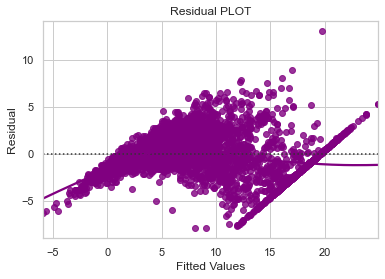

In [83]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No strong pattern in residual plot, hence assumption is satisfied.

### 4. TEST FOR HOMOSCEDASTICITY

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**As seen before, no pattern is observed in residual plot. Hence, this assumption is satisfied**

----

### 5. TEST FOR NORMALITY


* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.


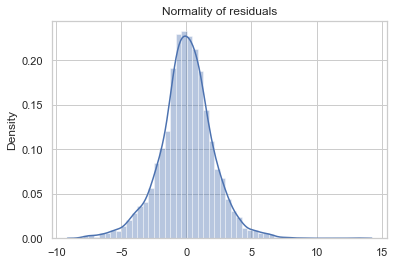

In [84]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

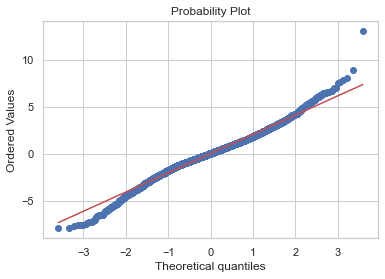

In [85]:
import pylab
import scipy.stats as stats
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

**As per QQ plot they are approximately normal. So, this assumption is also satisfied.**

**Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part**

In [86]:
# first we add the constant to test input variables
X_test['constant'] = 1

X_test_final = X_test[X_train8.columns]

In [87]:
X_test_final.head()

,Mileage,Seats,Age_log,Power_log,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_RENAULT,Brand_SKODA,Brand_SMART,Brand_TATA,Brand_TOYOTA,Brand_VOLVO,constant
2868,0.723967,0.0,0.603912,0.399556,0.902867,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5924,0.379733,0.0,0.280803,0.652198,0.760097,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3764,0.366824,0.0,0.539166,0.732997,0.936039,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4144,0.792814,0.0,0.381026,0.363189,0.860263,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2780,0.530336,0.0,0.806052,0.453091,0.958755,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
y_pred_1 = lin_reg_model1.predict(X_test_final)

## Checking the performance on train and test

In [89]:
print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train8, y_train))

Training Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  2.062048  1.542433  33.327087  0.871203      0.869718


In [90]:
print('Test Performance\n')
print(model_perf(lin_reg_model1, X_test_final, y_test))

Test Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  2.197124  1.614988  34.46463  0.857685      0.853797


* **Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting.**

* **Hence we can conclude the model "lin_reg_model1" is good for prediction as well as inference purpose.**

* **For improvement of model, we can consider the interaction of features and can apply higher order linear regression with LASSO/Ridge optimization.**


In [91]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train8,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(lin_reg_model1.coef_.flatten(), \
                       index=X_train8.columns.tolist(), columns=['Coefficients'])
print(coef_df)

                           Coefficients
Mileage                   -4.584492e+00
Seats                     -1.865175e-13
Age_log                   -8.413552e+00
Power_log                  1.162486e+01
Kilometers_Driven_log     -3.559437e+00
Location_Bangalore         7.897185e-01
Location_Chennai          -1.483989e-01
Location_Coimbatore        3.980560e-01
Location_Delhi            -5.753733e-01
Location_Hyderabad         3.894935e-01
Location_Jaipur           -2.341402e-02
Location_Kochi            -3.356875e-01
Location_Kolkata          -1.270734e+00
Location_Mumbai           -5.790675e-01
Location_Pune             -3.013541e-01
Fuel_Type_Electric         8.166443e+00
Fuel_Type_LPG             -9.223743e-01
Fuel_Type_Petrol          -2.204101e+00
Transmission_Manual       -1.920478e+00
Owner_Type_Fourth & Above -2.274129e+00
Owner_Type_Second         -3.514557e-01
Owner_Type_Third          -9.617561e-01
Brand_AUDI                 3.327090e+00
Brand_BENTLEY              3.108624e-15


------

# Key Model Observations

Now this is our final model which follows all the assumptions and this can be used for interpretations

1. Power and Year(Age) come out to be very signifcant, as expected. As age of the car increases, the price decreases, as visible in the negative coefficient sign.

2. We can also see the significant impact of places and brand on the prices of used cars.

3. Electric and LPG cars are on good demand, that can be seen with the higher positive coefficient sign.

4. We can also see the clear the relevance of owner_type (Second, Third and Fourth & Above)

5. Engine and Power are positively correlated.

6. Automatic Transmission type adds up in the total price in comparison with Manual one.

---

# Actionable Insights & Recommendations
**Location : Geographical Benefit - Demographic factors**

1. The company should consider the Location-wise profit margin to sell the car, we can see from the model attributes that Location also plays a significant role in asceratining the price, so if we can make the transportation and regulatory in place, company can pursue this opportunity for more profit.

**Brand Value**

1. There can be higher profit considering the high +ve coefficient for top brands like Audi, BMW and Mercedes thus customer interest, so brnad segmentation can bring more benefits for Cars4U.

**Kilometers and Manufacturing Year**

1. It is evident from the model that customers focus more on Manufacturing year than the Kilometers_Driven, thus while buying the used cars, we should take this in our consideration for better better differential pricing and thus more profit.

**Market Trend**

1. The customers are more focussing on eco-friendly transmission type like Electric and LPG, thus we can get better price for these cars.

-----

## Analysis and Probable reason/ improvement Areas : 

- There is adjusted $R^2$ of 0.88 in the test data that shows the model to be a good fit, in linear regression.
- Model can be improved by following means - (as shown above)
  **We can consider the interaction between different featuers and thus can consider higher order liner regression.**
  **Model complexity can be well considered by using LASSO or Ridge optimization**
- Most of the New_Price values are null (more than 86%). We can get this data easily collected and enhance our dataset.
- Name of car can be considered for improvement in data collection methodolgy. Fot the above model purpose, Brand name 
is extracted considering the first word of name, though it can be improved. 

----- 

# Appendix

- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **histplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LinearRegression** : Ordinary least squares Linear Regression.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

------

## ***************************************************************************************************

## *******************************************************

---

# Additional : Also we can explore the Forward Feature Selection to match our above result


**Forward Feature Selection**
- Forward feature selection starts with an empty model and adds in variables one by one.
- In each forward step, we add the one variable that gives the sin gle best improvement to our model.
- We'll use forward feature selection on variables, we received after removing multicollinearity
- Also we'll remove const term, because sklearn adds that automatically unlike statmodels

In [92]:
X_train_new = X_train8.drop('constant', axis = 1)

In [93]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

reg = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg,k_features = X_train_new.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.2s finished

[2021-04-10 01:42:47] Features: 1/47 -- score: 0.6219027049290755[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished

[2021-04-10 01:42:48] Features: 2/47 -- score: 0.741213684990994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.2s finished

[2021-04-10 01:42:49] Features: 3/47 -- score: 0.7726082839561691[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [94]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
X_train6.columns[feat_cols]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]


Index(['Mileage', 'Engine', 'Seats', 'New_Price_log', 'Age_log', 'Power_log',
       'Kilometers_Driven_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW', 'Brand_CHEVROLET',
       'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE', 'Brand_FORD',
       'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR',
       'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND', 'Brand_MAHINDRA',
       'Brand_MINI', 'Brand_MITSUBISHI', 'Brand_NISSAN', 'Brand_RENAULT',
       'Brand_SKODA', 'Brand_SMART', 'Brand_TATA'],
      dtype='object')

**We can see that Adjusted-R square starts decreasing after addition of 41st feature, so we will proceed only with best 40 features**

* Now we'll change k_features to 41.

In [95]:
reg = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(reg, k_features = 41, forward=True,
           floating=False, scoring='r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.2s finished

[2021-04-10 01:43:28] Features: 1/41 -- score: 0.6219027049290755[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished

[2021-04-10 01:43:29] Features: 2/41 -- score: 0.741213684990994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.2s finished

[2021-04-10 01:43:31] Features: 3/41 -- score: 0.7726082839561691[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [96]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
X_train5.columns[feat_cols]

[0, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46]


Index(['Mileage', 'Seats', 'New_Price_log', 'Age_log', 'Power_log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW',
       'Brand_CHEVROLET', 'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE',
       'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR',
       'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_MAHINDRA', 'Brand_MINI',
       'Brand_MITSUBISHI', 'Brand_NISSAN', 'Brand_RENAULT', 'Brand_SKODA',
       'Brand_SMART'],
      dtype='object')

In [97]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
X_train5.columns[feat_cols]

[0, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46]


Index(['Mileage', 'Seats', 'New_Price_log', 'Age_log', 'Power_log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW',
       'Brand_CHEVROLET', 'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE',
       'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR',
       'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_MAHINDRA', 'Brand_MINI',
       'Brand_MITSUBISHI', 'Brand_NISSAN', 'Brand_RENAULT', 'Brand_SKODA',
       'Brand_SMART'],
      dtype='object')

### Now we will fit a sklearn model using these features only

In [98]:
X_train_final = X_train[X_train8.columns[feat_cols]]

In [99]:
X_test.columns

Index(['Mileage', 'Engine', 'Seats', 'New_Price_log', 'Age_log', 'Power_log',
       'Kilometers_Driven_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW',
       'Brand_CHEVROLET', 'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE',
       'Brand_FORD', 'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU',
       'Brand_JAGUAR', 'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND',
       'Brand_MAHINDRA', 'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI',
       'Brand_MITSUBISHI', 'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT',
       'Brand_SKODA', 'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA',
 

In [100]:
#Creating new x_test with the same 18 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [101]:
#Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train_final,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_), \
                       index=X_train_final.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

# model performance on train set
print('\n\nTraining Performance\n')
print(model_perf(lin_reg_model2, X_train_final, y_train))

                           Coefficients
Mileage                   -4.543511e+00
Age_log                   -8.411644e+00
Power_log                  1.162025e+01
Kilometers_Driven_log     -3.546347e+00
Location_Bangalore         9.471663e-01
Location_Coimbatore        5.531639e-01
Location_Delhi            -4.188679e-01
Location_Hyderabad         5.452338e-01
Location_Kochi            -1.794061e-01
Location_Kolkata          -1.114359e+00
Location_Mumbai           -4.192882e-01
Fuel_Type_Electric         8.161741e+00
Fuel_Type_LPG             -9.233223e-01
Fuel_Type_Petrol          -2.204890e+00
Transmission_Manual       -1.922928e+00
Owner_Type_Fourth & Above -2.295428e+00
Owner_Type_Second         -3.548738e-01
Owner_Type_Third          -9.817947e-01
Brand_AUDI                 3.345828e+00
Brand_BENTLEY              6.439294e-15
Brand_BMW                  2.584451e+00
Brand_CHEVROLET           -2.149558e+00
Brand_DATSUN              -1.680001e+00
Brand_FIAT                -1.763475e+00


In [102]:
# model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model2, X_test_final, y_test))

Test Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  2.198665  1.614517  34.462565  0.857485      0.854173


* **Both $R^2$ score and RMSE show that the model fitted is good, has no overfitting and can be used for making predictions.**

## We can see here that the results from 'lin_reg_model1' and 'lin_reg_model2' models are approximately same.**
